## 이미지 데이터 + 비지도학습 분류
---
- 이미지 데이터 정보 : 100 * 100 , 흑백이미지

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
FILE='./fruits_300.npy'

In [7]:
fruits = np.load(FILE)

In [8]:
fruits.shape

(300, 100, 100)

In [9]:
fruits_2d = fruits.reshape(-1, fruits.shape[1]*fruits.shape[2])

In [10]:
fruits_2d.shape

(300, 10000)

In [11]:
fruitCluster=KMeans(n_clusters=3)

In [12]:
fruitCluster.fit(fruits_2d)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

In [30]:
# Cluster 객체 속성 확인
print(f' cluster_centers_ : {fruitCluster.cluster_centers_}')
print('-------------------------------------------------------------')
print(f' labels_ : {fruitCluster.labels_}')
print('-------------------------------------------------------------')
print(f' labels_ Counts : {np.unique(fruitCluster.labels_, return_counts=True)}')
print('-------------------------------------------------------------')
print(f' inertia_ : {fruitCluster.inertia_}')
print('-------------------------------------------------------------')
print(f' n_iter_ : {fruitCluster.n_iter_}')

 cluster_centers_ : [[1.01098901 1.01098901 1.01098901 ... 1.         1.         1.        ]
 [1.10204082 1.07142857 1.10204082 ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
-------------------------------------------------------------
 labels_ : [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
-------------------------------------------------------------
 labels_ Counts

In [14]:
# 샘플데이터 => 결정된 군집으로 변환
translfruit=fruitCluster.transform(fruits_2d)

In [16]:
fruitCluster.cluster_centers_[0][0]

1.010989010989011

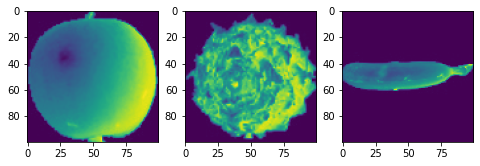

In [29]:
fig=plt.figure(figsize=(8,8))

plt.subplot(1, 3, 1)
plt.imshow(fruits_2d[1].reshape(100,100))

plt.subplot(1, 3, 2)
plt.imshow(fruits_2d[101].reshape(100,100))

plt.subplot(1, 3, 3)
plt.imshow(fruits_2d[200].reshape(100,100))
plt.show()

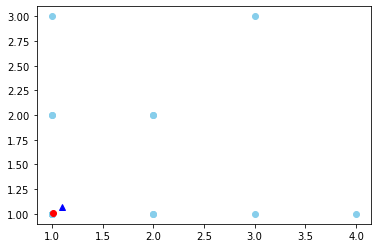

In [17]:
plt.scatter(fruits_2d[:, 0], fruits_2d[:, 1], c='skyblue')
plt.plot(fruitCluster.cluster_centers_[0][0], fruitCluster.cluster_centers_[0][1], 'ro',label='c1')
plt.plot(fruitCluster.cluster_centers_[1][0], fruitCluster.cluster_centers_[1][1], 'b^',label='c2')
plt.show()